**Dataset: [Kaggle](https://www.kaggle.com/mohansacharya/graduate-admissions)**

## Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import pickle
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# read the csv file 
admission_df = pd.read_csv('Admission_Predict.csv')

In [3]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Let's drop the serial no.
admission_df.drop('Serial No.', axis = 1, inplace = True)
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


## Exploratory Data Analysis

In [5]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [6]:
# checking the null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
# Check the dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [8]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
# Grouping by University ranking 
df_university = admission_df.groupby(by = 'University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


In [10]:
admission_df.shape

(500, 8)

## Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029E31054DC8>,
      dtype=object)

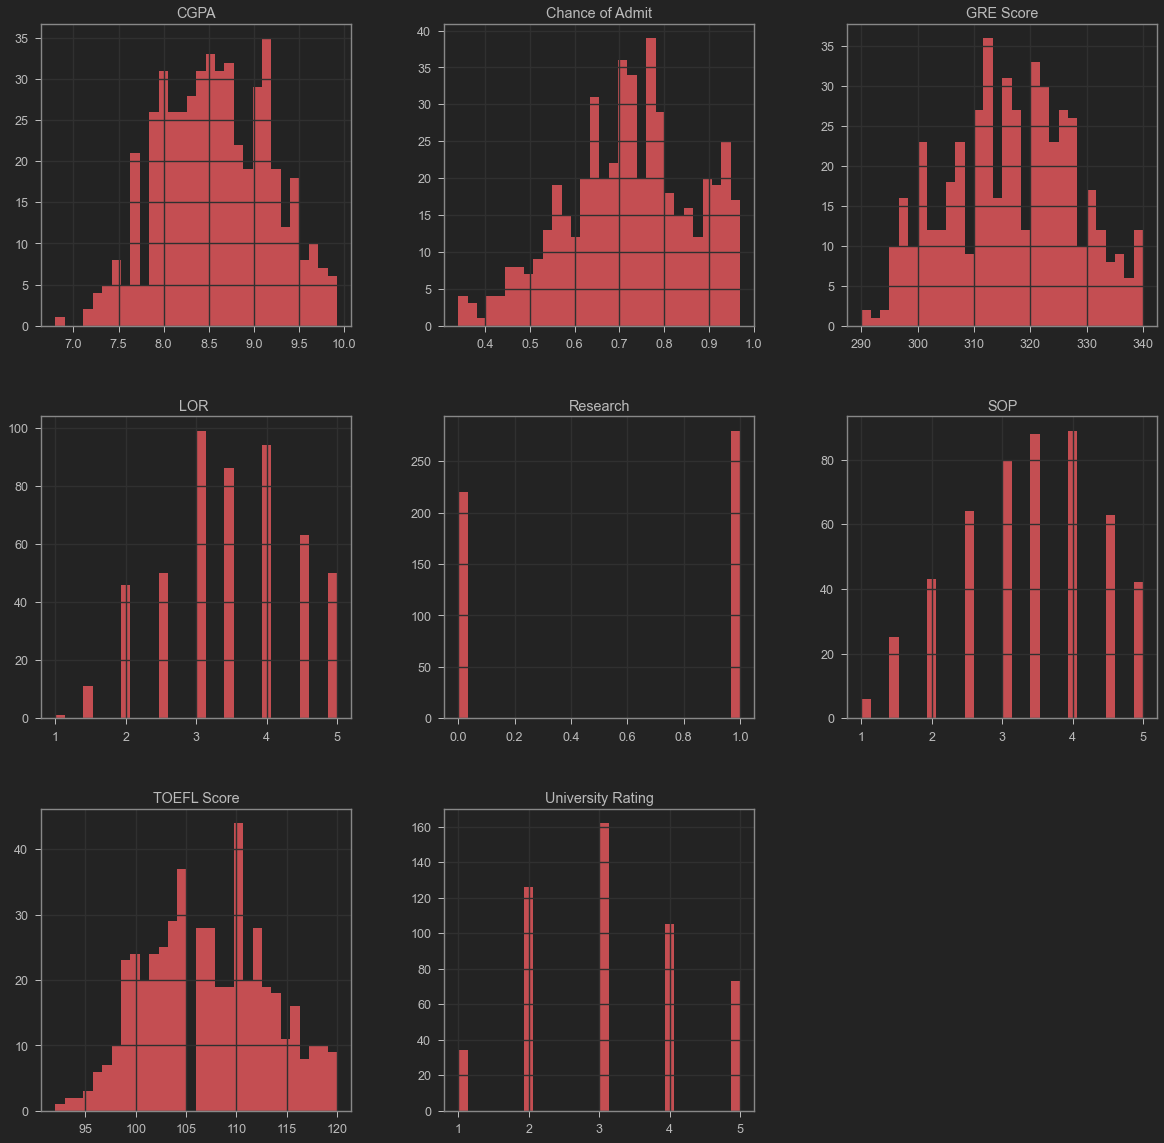

In [11]:
admission_df.hist(bins = 30, figsize = (20, 20), color = 'r')

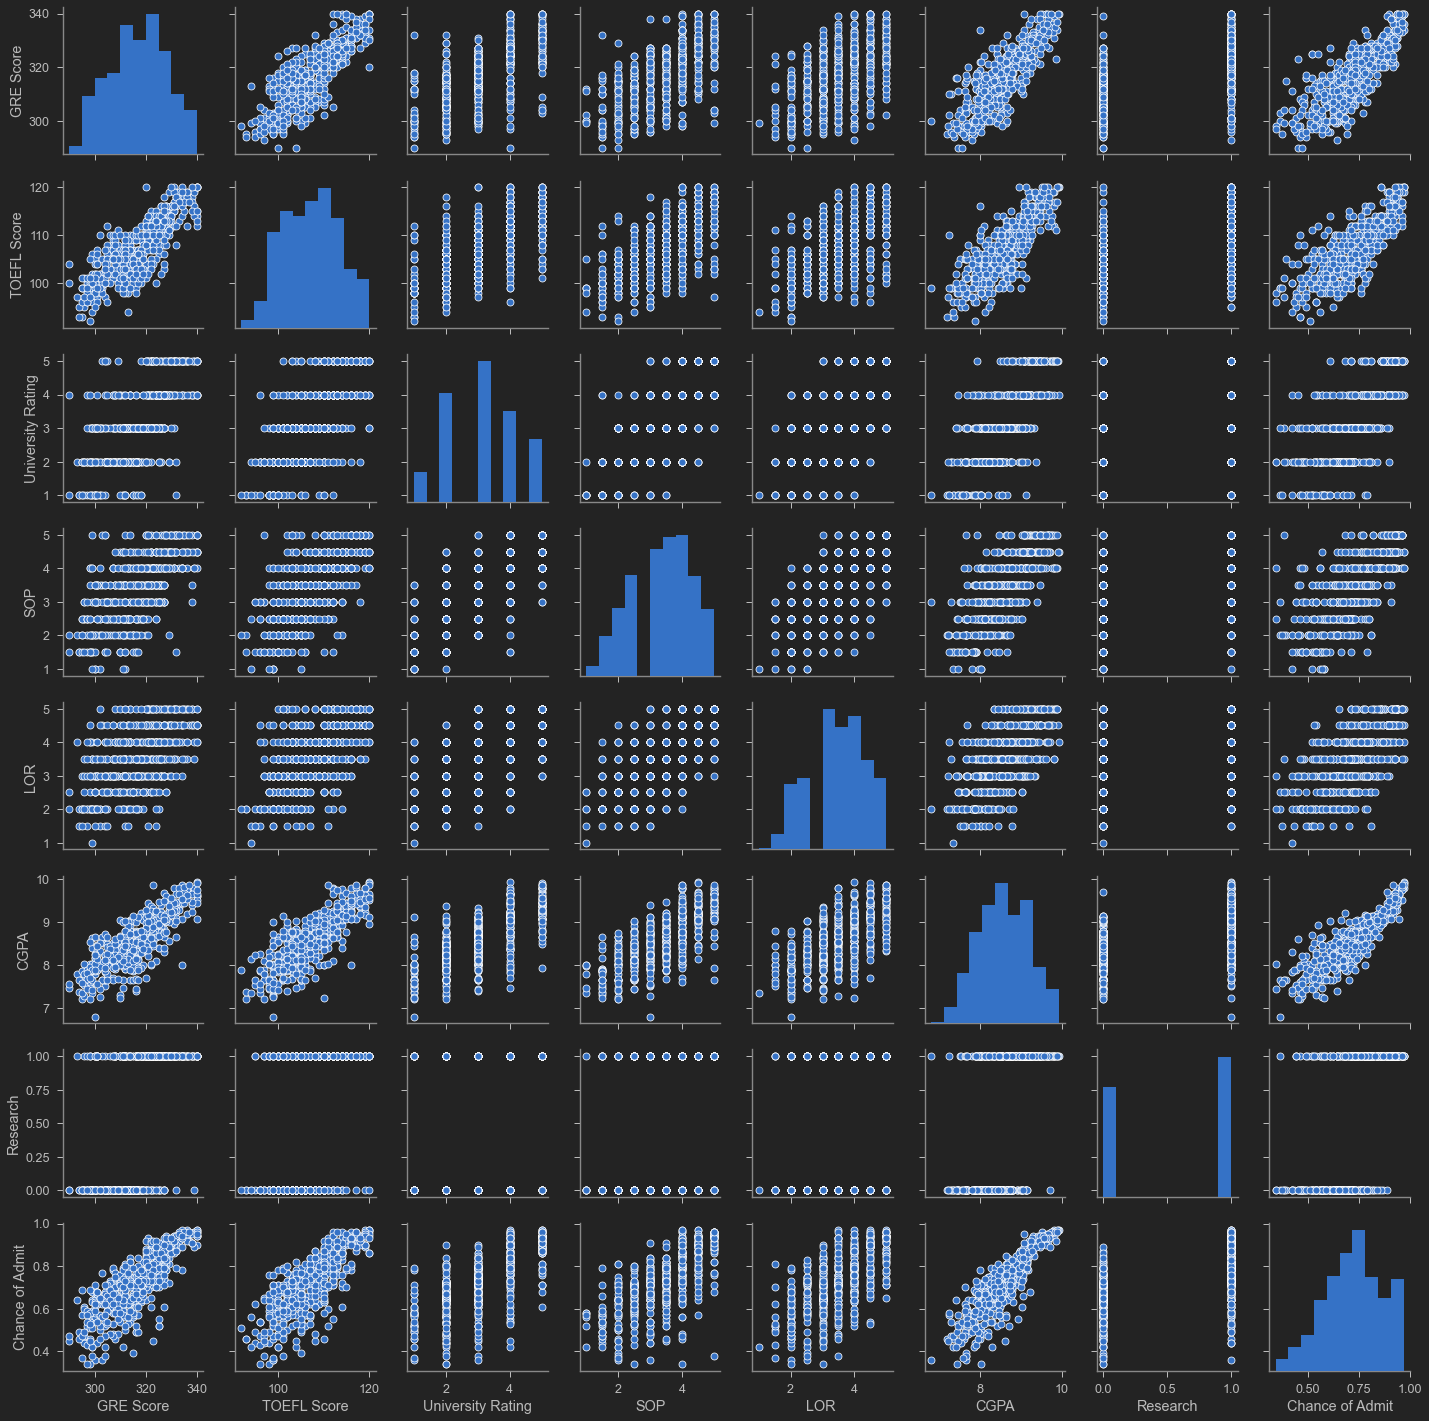

In [12]:
sns.pairplot(admission_df)


Text(0.5, 1.0, 'GRE Score Vs Chance of Admission')

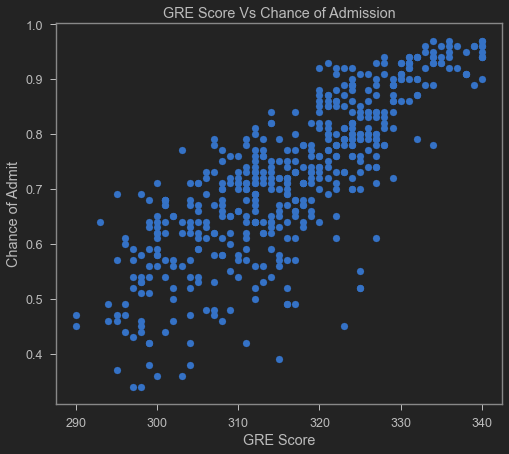

In [13]:
plt.scatter(admission_df['GRE Score'], admission_df['Chance of Admit'])
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('GRE Score Vs Chance of Admission')

Text(0.5, 1.0, 'TOEFL Score Vs Chance of Admission')

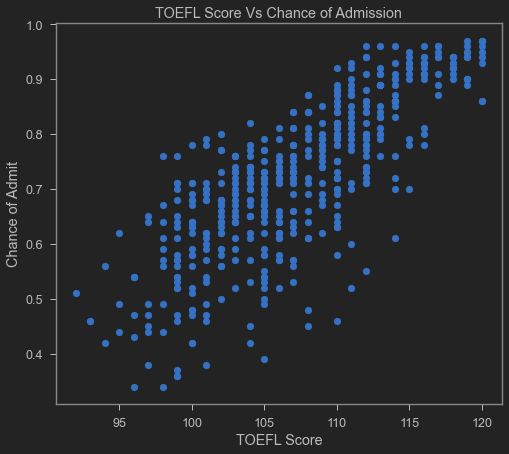

In [14]:
plt.scatter(admission_df['TOEFL Score'], admission_df['Chance of Admit'])
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.title('TOEFL Score Vs Chance of Admission')

**We can see that the chance of admission increases, with an increase in TOEFL score**

Text(0.5, 1.0, 'University Ranking Vs CGPA')

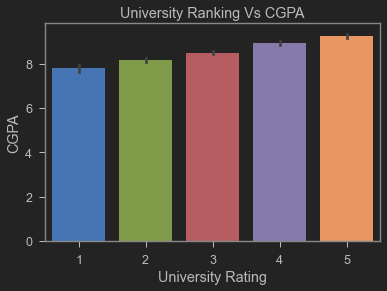

In [15]:
plt.figure(figsize=(6, 4))
sns.barplot(x='University Rating', y='CGPA', data=admission_df)
plt.title('University Ranking Vs CGPA')

**Observation:** *It can inferred that Students with higher CGPA get admitted to higher ranking universities, or students from top rated universities have a higher CGPA*

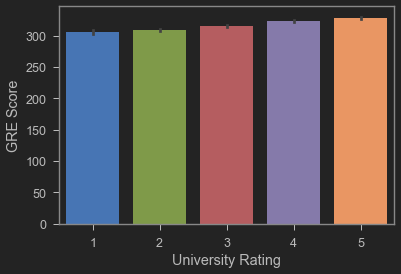

In [16]:
plt.figure(figsize=(6, 4))
sns.barplot(x='University Rating', y='GRE Score', data=admission_df)

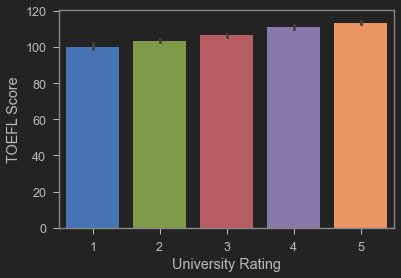

In [17]:
plt.figure(figsize=(6, 4))
sns.barplot(x='University Rating', y='TOEFL Score', data=admission_df)

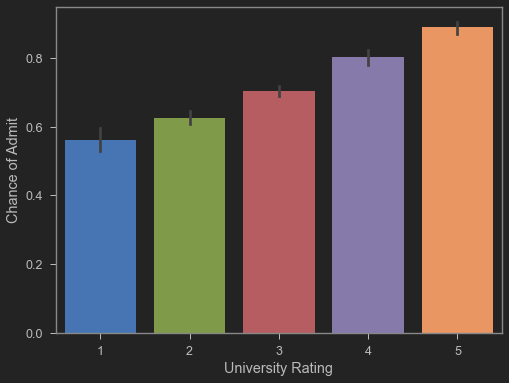

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x='University Rating', y='Chance of Admit', data=admission_df)

Text(0, 0.5, 'Frequency')

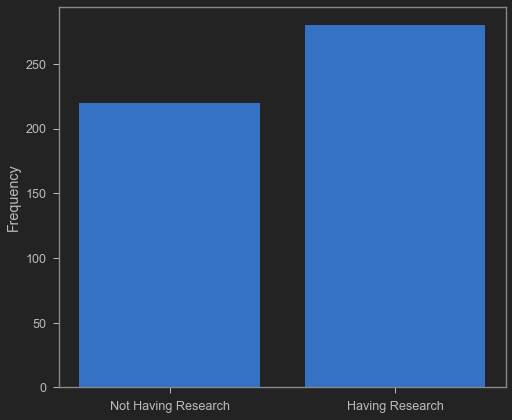

In [19]:
x = ['Not Having Research', 'Having Research']
y = np.array([len(admission_df[admission_df.Research == 0]),
              len(admission_df[admission_df.Research == 1])])
plt.bar(x, y)
plt.ylabel('Frequency')

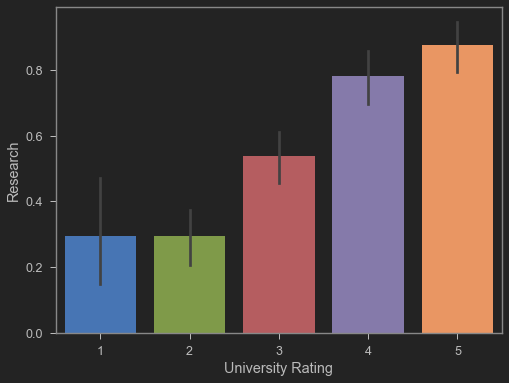

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(x='University Rating',y='Research',data=admission_df)

Text(0, 0.5, 'SOP')

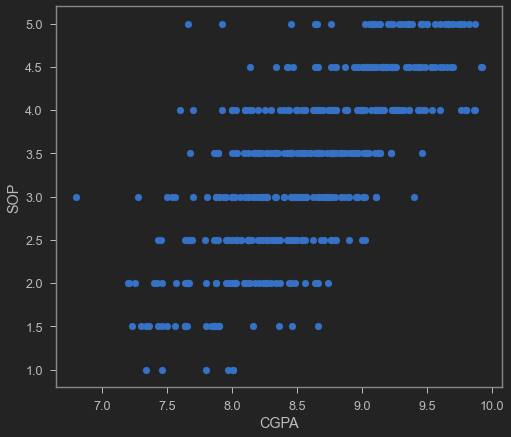

In [21]:
plt.scatter(admission_df['CGPA'],admission_df['SOP'])
plt.xlabel('CGPA')
plt.ylabel('SOP')

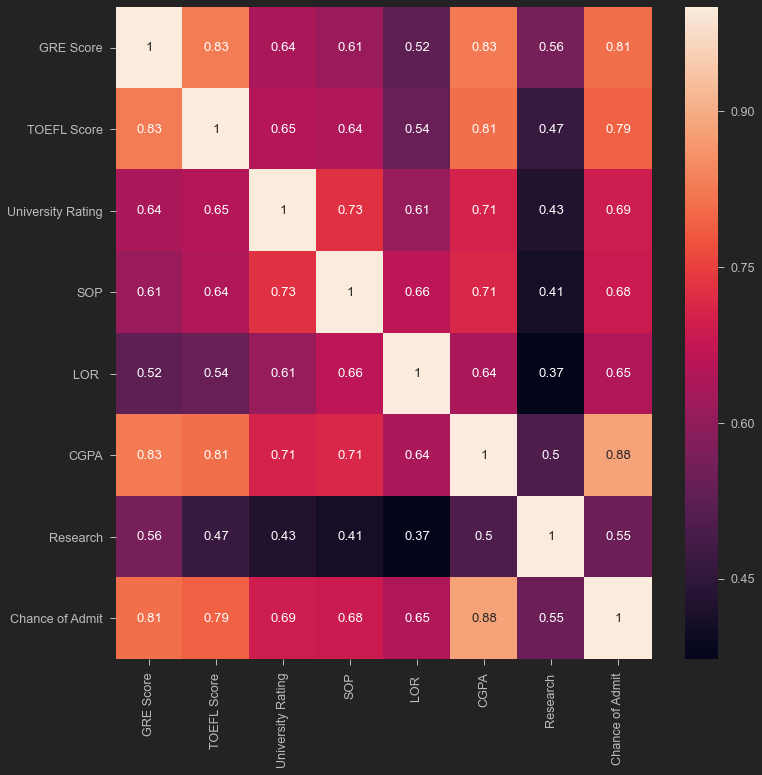

In [22]:
corr_matrix = admission_df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix,annot = True)
plt.show()

## Training and Test DataSet

In [23]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [24]:
X = admission_df.drop(columns = ['Chance of Admit'])

In [25]:
y = admission_df['Chance of Admit']

In [26]:
X.shape

(500, 7)

In [27]:
y.shape

(500,)

In [28]:
X = np.array(X)
y = np.array(y)

In [29]:
y = y.reshape(-1, 1)
y.shape

(500, 1)

In [30]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [31]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [32]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

## Train and evaluate Regression Model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [34]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)
y_pred_lr = LinearRegression_model.predict(X_test)

In [35]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.7678795941558678

## Train and evaluate Decision Tree and Rand Forest Models

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
DecisionTree_model = DecisionTreeRegressor(random_state=42)
DecisionTree_model.fit(X_train, y_train)
y_pred_dtr = DecisionTree_model.predict(X_test)

In [37]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.6131277490453865

In [38]:
print('MAE',metrics.mean_absolute_error(y_test,y_pred_dtr))
print('MSE',metrics.mean_squared_error(y_test,y_pred_dtr))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred_dtr)))

MAE 0.41607803177986685
MSE 0.35786671279767107
RMSE 0.5982196192015697


In [39]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators=100, random_state=37)
RandomForest_model.fit(X_train, y_train)
y_pred_rfr = RandomForest_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.7604219488617141

## Regression Model KPIs

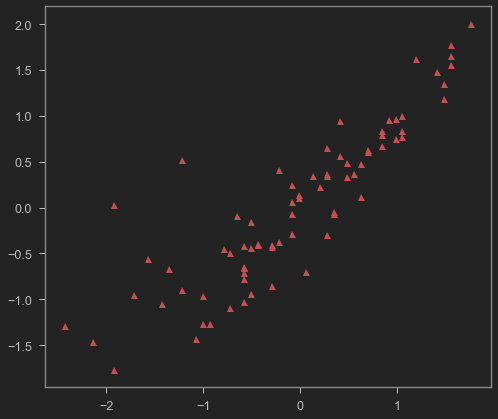

In [41]:
y_predict = LinearRegression_model.predict(X_test)
plt.plot(y_test, y_predict, '^', color = 'r')

In [42]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

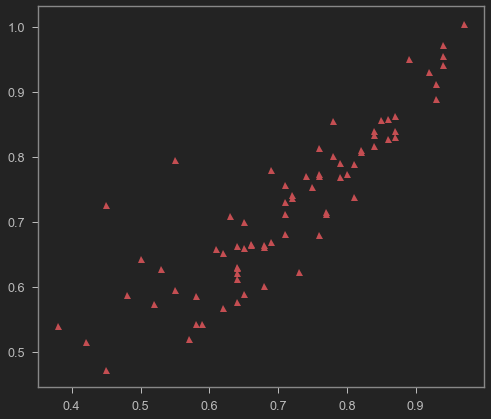

In [43]:
plt.plot(y_test_orig, y_predict_orig, '^', color = 'r')

In [44]:
k = X_test.shape[1]
n = len(X_test)
n

75

In [45]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.065 
MSE = 0.004268745845786002 
MAE = 0.043540301777387685 
R2 = 0.7678795941558678 
Adjusted R2 = 0.74362820847066


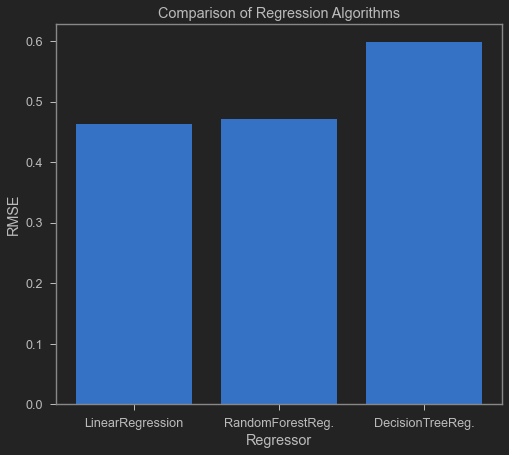

In [46]:
from sklearn import metrics
#Good model will have low RMSE
y = np.array([np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr)),np.sqrt(metrics.mean_squared_error(y_test,y_pred_rfr)),np.sqrt(metrics.mean_squared_error(y_test,y_pred_dtr))])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("RMSE")
plt.show()

**Linear Regression is a good model as it has the minimum RMSE**

In [47]:
X = [1,2,3,4]
X = np.array(X)
X = X.reshape(-1,1)

print(X.shape)

(4, 1)


## Preparing model for Deployement using LinearRegression

In [48]:
data = pd.read_csv('Admission_Predict.csv')

In [49]:
data=data.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [50]:
X = data.drop(["Serial No.","University Rating","SOP","LOR ","Research","Chance of Admit"],axis=1)
y = data["Chance of Admit"].values

In [51]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'CGPA'], dtype='object')

In [52]:
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X, y, test_size=0.15, random_state=37)

In [60]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X_train[X_train.columns] = scalerX.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scalerX.transform(X_test[X_test.columns])

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [61]:
from sklearn.linear_model import LinearRegression
lr_new = LinearRegression()
lr_new.fit(X_train_new,y_train_new)
y_pred_lr_new = lr_new.predict(X_test_new)

In [62]:
# Finding the Residuals
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,y_pred_lr_new))
print('MSE',metrics.mean_squared_error(y_test,y_pred_lr_new))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr_new)))

MAE 1.0258143181010482
MSE 1.60851089438568
RMSE 1.2682708284848627


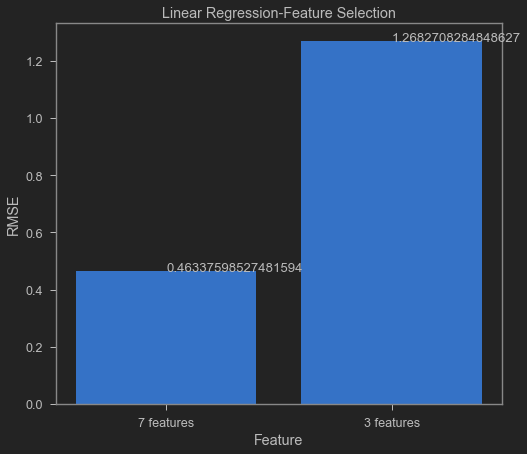

In [63]:
y = np.array([np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr)),np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr_new))])
x = ["7 features","3 features"]
plt.bar(x,y)
for a,b in zip(x, y):
    plt.text(a, b, str(b))
plt.title("Linear Regression-Feature Selection")
plt.xlabel("Feature")
plt.ylabel("RMSE")
plt.show()

**The two results are very close. If these 3 features (CGPA, GRE SCORE, and TOEFL SCORE) are used instead of all 7 features together, the result is not bad and performance is increased because less calculation is required.**

In [57]:
# Saving model to disk
pickle.dump(lr_new, open('model.pkl','wb'))

In [58]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[312,112,8.87]]))

[0.76705426]
